<a href="https://colab.research.google.com/github/apanand/UChicago-MSADS/blob/main/Apoorv_Prophet_Orbit_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EDA

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns

#from mpl_toolkits.basemap import Basemap
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [2]:
# prompt: mount my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
root_dir = "/content/drive/Shareddrives/Time Series Project"

In [43]:
df = pd.read_csv(f'{root_dir}/Copy of Zillow.csv')

In [44]:
df

,Metric,2/29/96,3/31/96,4/30/96,5/31/96,6/30/96,7/31/96,8/31/96,9/30/96,10/31/96,...,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24
0,home_value,101741.6914,101999.2795,102545.3385,103287.9317,104089.7239,104874.0240,105300.1752,105428.1642,105381.0947,...,347061.8343,348104.4169,352069.6802,356120.2077,359112.6558,361237.9458,362419.9663,362308.7904,361437.8462,360385.4325
1,unemployment_rate,0.0550,0.0550,0.0560,0.0560,0.0530,0.0550,0.0510,0.0520,0.0520,...,0.0370,0.0390,0.0380,0.0390,0.0400,0.0410,0.0430,0.0420,0.0410,0.0410
2,cpi,155.0000,155.5000,156.1000,156.4000,156.7000,157.0000,157.2000,157.7000,158.2000,...,309.6850,311.0540,312.2300,313.2070,313.2250,313.0490,313.5340,314.1210,314.6860,315.4540
3,interest_rate,0.0605,0.0525,0.0550,0.0531,0.0500,0.0675,0.0528,0.0609,0.0563,...,0.0533,0.0533,0.0533,0.0533,0.0533,0.0533,0.0533,0.0533,0.0483,0.0483
4,fixed_mortgage,0.0732,0.0769,0.0792,0.0803,0.0829,0.0819,0.0809,0.0816,0.0786,...,0.0669,0.0694,0.0679,0.0717,0.0703,0.0686,0.0678,0.0635,0.0608,0.0672


In [45]:
# prompt: drop row 4 with the fixed_mortgage

# Assuming 'fixed_mortgage' is the column name and you want to drop the 4th row (index 3)
df = df.drop(index=4)

In [46]:
df

,Metric,2/29/96,3/31/96,4/30/96,5/31/96,6/30/96,7/31/96,8/31/96,9/30/96,10/31/96,...,1/31/24,2/29/24,3/31/24,4/30/24,5/31/24,6/30/24,7/31/24,8/31/24,9/30/24,10/31/24
0,home_value,101741.6914,101999.2795,102545.3385,103287.9317,104089.7239,104874.0240,105300.1752,105428.1642,105381.0947,...,347061.8343,348104.4169,352069.6802,356120.2077,359112.6558,361237.9458,362419.9663,362308.7904,361437.8462,360385.4325
1,unemployment_rate,0.0550,0.0550,0.0560,0.0560,0.0530,0.0550,0.0510,0.0520,0.0520,...,0.0370,0.0390,0.0380,0.0390,0.0400,0.0410,0.0430,0.0420,0.0410,0.0410
2,cpi,155.0000,155.5000,156.1000,156.4000,156.7000,157.0000,157.2000,157.7000,158.2000,...,309.6850,311.0540,312.2300,313.2070,313.2250,313.0490,313.5340,314.1210,314.6860,315.4540
3,interest_rate,0.0605,0.0525,0.0550,0.0531,0.0500,0.0675,0.0528,0.0609,0.0563,...,0.0533,0.0533,0.0533,0.0533,0.0533,0.0533,0.0533,0.0533,0.0483,0.0483


In [29]:
# Reshape the dataset for all metrics
metrics_data = df.set_index('Metric').transpose()
metrics_data.index = pd.to_datetime(metrics_data.index, format='%m/%d/%y')
metrics_data = metrics_data.rename_axis('ds').reset_index()

In [30]:
# Extract individual metrics from the dataset for visualization
metrics_data_cleaned = metrics_data.copy()
metrics_data_cleaned.columns = ['Date', 'Home Value', 'Unemployment Rate', 'CPI', 'Interest Rate']
metrics_data_cleaned = metrics_data_cleaned.melt(id_vars='Date', var_name='Metric', value_name='Value')

In [31]:
# Define the original metrics
original_metrics = ['Home Value', 'Unemployment Rate', 'CPI', 'Interest Rate']

In [32]:
sns.set_theme(style="whitegrid")

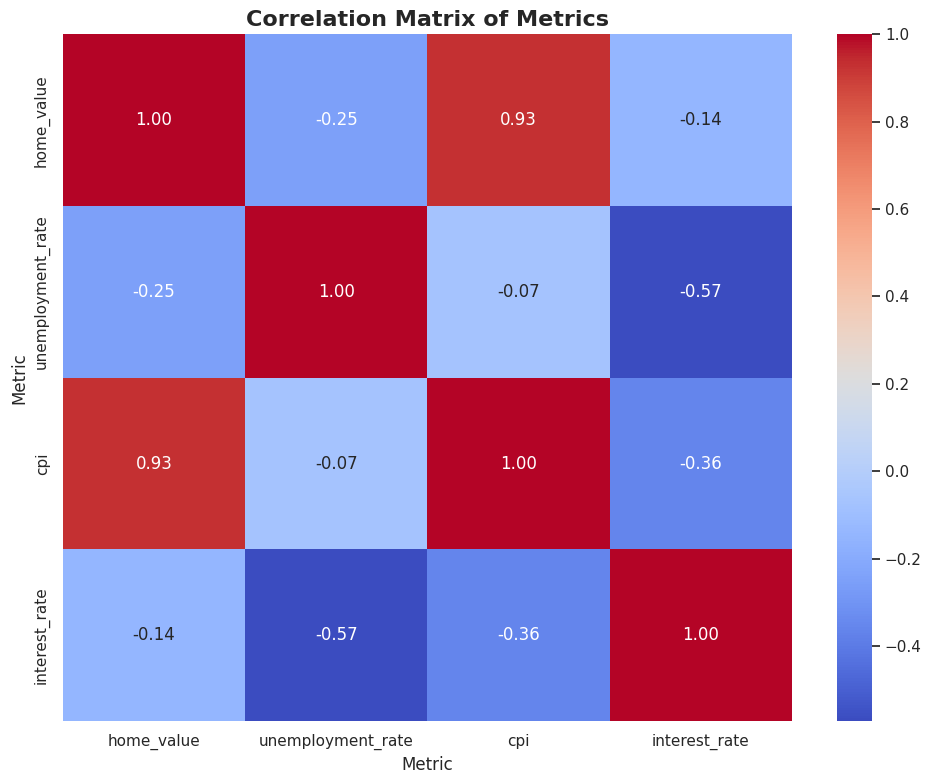

In [33]:
metrics_numeric = metrics_data[['home_value', 'unemployment_rate', 'cpi', 'interest_rate']].dropna()
correlation_matrix = metrics_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Metrics', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
data = pd.read_csv(f'{root_dir}/Apoorv/zillow_original.csv')

In [ ]:
data

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30
0,102001,0,United States,country,NaN,122086.021122,122300.809571,122567.178873,123138.488742,123795.997905,...,352438.988641,352871.125244,353663.049434,355203.175029,357057.591856,358490.016311,359051.100806,359199.002432,359442.147602,359892.330217
1,394913,1,"New York, NY",msa,NY,217122.541025,218045.189320,218976.383000,220863.341724,222817.352828,...,636012.173657,638910.016157,642966.642072,648387.612667,654515.723240,659189.389934,662279.916065,665035.225532,668789.821153,672829.144441
2,753899,2,"Los Angeles, CA",msa,CA,221698.801779,222523.802610,223622.695850,225809.124252,228200.391475,...,924860.361784,925014.427975,922051.953295,920931.486350,924412.639390,930330.520459,934301.462201,938697.562418,943906.910962,950360.257525
3,394463,3,"Chicago, IL",msa,IL,152707.070761,152848.433024,153117.659942,153787.429609,154593.081957,...,309382.860474,310041.794022,311424.500644,313828.060374,316689.129728,318801.724714,320020.693936,320754.165504,321672.989771,322672.908701
4,394514,4,"Dallas, TX",msa,TX,125949.506035,126005.604384,126070.095181,126237.571004,126458.383292,...,371634.623480,371656.298301,372138.074786,373294.797427,374262.529226,374406.192808,373742.522251,372804.928815,372154.385738,371956.830325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,753929,935,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,118359.872400,116682.687551,115884.293433,116000.373448,117451.032836,119096.239595,120143.734348,120346.496326,120025.711238,119439.176654
891,394743,936,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,385078.254803,384848.609039,384968.617127,386667.551227,388186.072987,389306.469242,389375.536946,388610.414440,388559.826240,389885.013270
892,753874,937,"Craig, CO",msa,CO,99177.666841,99431.271071,99903.415713,100575.793294,101357.142071,...,286363.688974,285593.868872,285524.713167,285989.589648,286773.441287,287679.754799,288020.430854,288345.269280,288574.565915,289940.677141
893,395188,938,"Vernon, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,88079.042304,87369.286719,87417.685136,88049.241200,88761.701599,89386.943727,89639.563707,89444.678910,88979.774222,87762.111311


In [ ]:
# prompt: count unique number of StateName in data

import pandas as pd

# Assuming 'data' DataFrame is already loaded as in the provided code.
# If not, load it first:
# data = pd.read_csv(f'{root_dir}/Apoorv/zillow_original.csv')

unique_states = data['StateName'].nunique()
print(f"The number of unique states in the dataset is: {unique_states}")

The number of unique states in the dataset is: 50


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Add 2024 Average Home Value column
data['2024_Average_Home_Value'] = data.loc[:, '2024-01-31':'2024-09-30'].mean(axis=1)

# Aggregate the average home values by state
state_avg_home_values = data.groupby('StateName')['2024_Average_Home_Value'].mean().reset_index()

# Identify the top 10 cities with the highest average home values
top_10_cities = data[['RegionName', '2024_Average_Home_Value']].sort_values(
    by='2024_Average_Home_Value', ascending=False
).head(10)

# Add coordinates for the top 10 cities (manually entered)
city_coords = {
    'San Jose, CA': [37.3382, -121.8863],
    'Vineyard Haven, MA': [41.3556, -70.6043],
    'Jackson, WY': [43.4799, -110.7624],
    'Edwards, CO': [39.6411, -106.5845],
    'Santa Cruz, CA': [36.9741, -122.0308],
    'San Francisco, CA': [37.7749, -122.4194],
    'Heber, UT': [40.5068, -111.4353],
    'Steamboat Springs, CO': [40.4854, -106.8319],
    'Kailua, HI': [21.3917, -157.7394],
    'Key West, FL': [24.5550, -81.7800]
}

# Map city coordinates and labels to the DataFrame
top_10_cities['lat'] = top_10_cities['RegionName'].map(lambda x: city_coords.get(x, [None, None])[0])
top_10_cities['lon'] = top_10_cities['RegionName'].map(lambda x: city_coords.get(x, [None, None])[1])
top_10_cities['label'] = top_10_cities.apply(
    lambda row: f"{row['RegionName']}: ${row['2024_Average_Home_Value']/1_000_000:.2f}M", axis=1
)

# Create the map using Plotly
fig = go.Figure()

# Add the choropleth layer for states
fig.add_trace(go.Choropleth(
    locations=state_avg_home_values['StateName'],
    z=state_avg_home_values['2024_Average_Home_Value'],
    locationmode='USA-states',
    colorscale='Blues',
    colorbar_title='Avg Home Value ($)',
    geo='geo'
))

# Add points for the top 10 cities
fig.add_trace(go.Scattergeo(
    locationmode='USA-states',
    lon=top_10_cities['lon'],
    lat=top_10_cities['lat'],
    text=top_10_cities['label'],
    marker=dict(size=10, color='red', symbol='circle'),
    name="Top 10 Cities"
))

# Update layout for presentation readiness
fig.update_layout(
    title_text="Average Home Value by State in 2024 with Top 10 Cities",
    geo=dict(
        scope='usa',
        projection=go.layout.geo.Projection(type='albers usa'),
        showlakes=True,
        lakecolor='rgb(255, 255, 255)'
    )
)

fig.show()


##Facebook Prophet Package

In [ ]:
!pip install prophet

ERROR: Operation cancelled by user


In [ ]:
from prophet import Prophet

In [ ]:
# Filter the dataset for the "United States" row
us_data = df[df['RegionName'] == 'United States']

In [ ]:
# Transpose and reshape the data for Prophet
us_data = us_data.drop(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], axis=1).transpose()
us_data.reset_index(inplace=True)
us_data.columns = ['ds', 'y']

In [ ]:
# Convert 'ds' column to datetime
us_data['ds'] = pd.to_datetime(us_data['ds'])

In [ ]:
train_data = us_data.iloc[:-36]  # Use all but the last 3 years for training
test_data = us_data.iloc[-36:]  # Use the last 3 years for testing

In [ ]:
model = Prophet()

In [ ]:
model.fit(train_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qtple62/nkuyb5dq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qtple62/_za9c05i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=597', 'data', 'file=/tmp/tmp3qtple62/nkuyb5dq.json', 'init=/tmp/tmp3qtple62/_za9c05i.json', 'output', 'file=/tmp/tmp3qtple62/prophet_modellbzlnr2u/prophet_model-20241204021845.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:18:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:18:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create a dataframe for future dates (next 3 years)
future = model.make_future_dataframe(periods=36, freq='M')

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
# Forecast future values
forecast = model.predict(future)

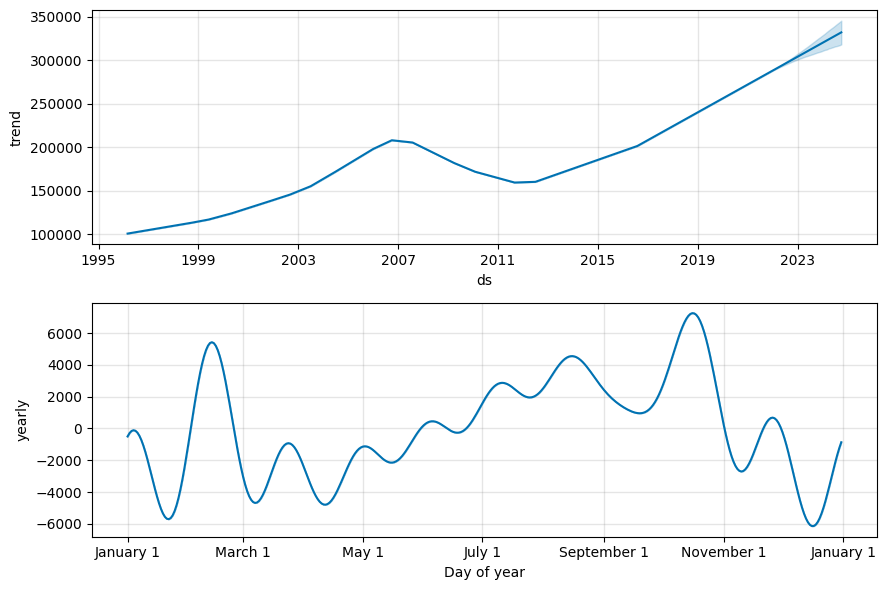

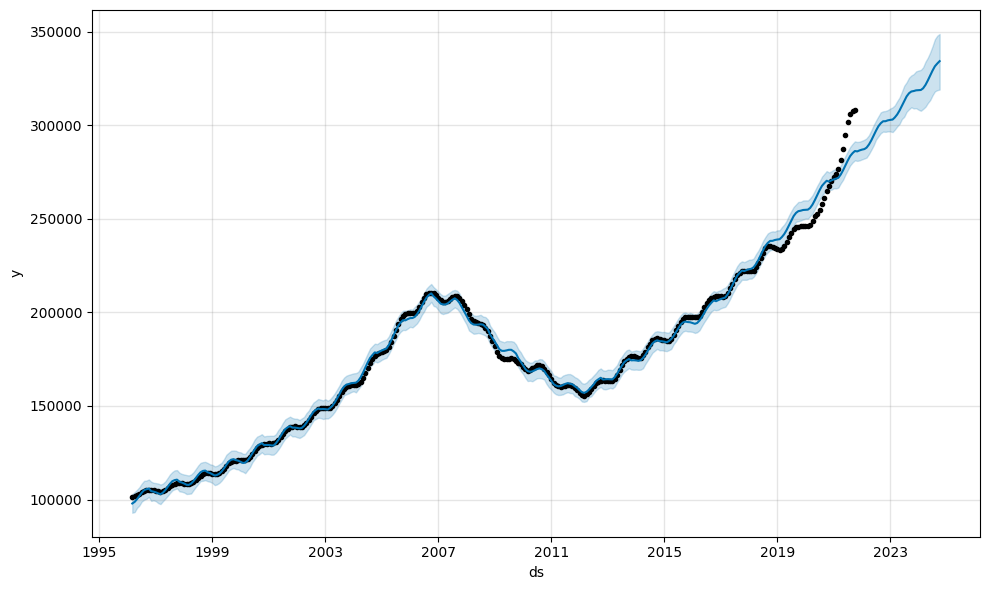

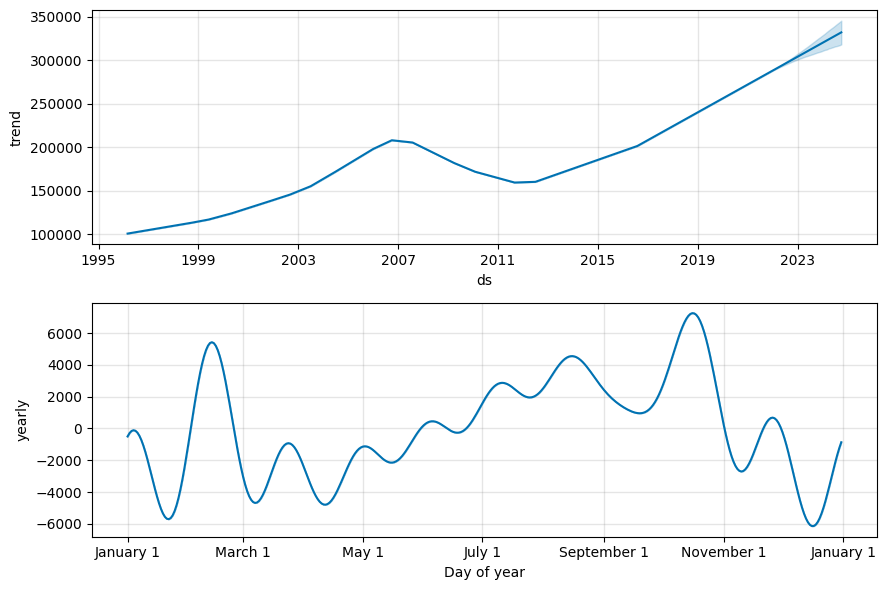

In [ ]:
model.plot(forecast)
model.plot_components(forecast)

In [ ]:
print("\nForecast for the next 3 years:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(36))



Forecast for the next 3 years:
            ds           yhat     yhat_lower     yhat_upper
308 2021-10-31  286030.489893  280958.645210  291049.266885
309 2021-11-30  286574.174307  281237.212490  291215.333710
310 2021-12-31  286980.082299  281761.327931  291709.532683
311 2022-01-31  287269.272269  282244.743110  292277.197413
312 2022-02-28  288032.981664  282715.509886  293036.872718
313 2022-03-31  289709.628731  284613.882675  294680.474033
314 2022-04-30  291885.475988  286858.667890  297150.276683
315 2022-05-31  294488.557362  289279.827009  300047.576150
316 2022-06-30  297082.872470  292289.817481  302444.449244
317 2022-07-31  299467.203639  294072.216395  304712.140636
318 2022-08-31  301087.031512  295792.125056  306899.506843
319 2022-09-30  302127.585190  296607.033353  307450.057580
320 2022-10-31  302157.415500  296474.936610  307616.228358
321 2022-11-30  302615.255812  296724.176554  308109.112358
322 2022-12-31  302865.930522  296721.784135  308926.612536
323 2023

In [ ]:
# Evaluate model accuracy on the test set
# Merge forecast with actual test data
forecast_test = forecast.set_index('ds').join(test_data.set_index('ds'), how='inner', lsuffix='_forecast', rsuffix='_actual')

In [ ]:
# Calculate accuracy metrics
mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
mse = mean_squared_error(forecast_test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)

In [ ]:
print("\nModel Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Model Accuracy Metrics:
Mean Absolute Error (MAE): 34852.62
Mean Squared Error (MSE): 1270478500.05
Root Mean Squared Error (RMSE): 35643.77


In [ ]:
summary_stats = forecast_test[['y', 'yhat']].describe()
print("\nSummary Statistics for Actual vs Forecasted Values:")
print(summary_stats)


Summary Statistics for Actual vs Forecasted Values:
                   y           yhat
count      36.000000      36.000000
mean   343389.612869  308536.994240
std     13999.805183   14483.488868
min    309825.420230  286030.489893
25%    337090.683879  298871.120846
50%    347161.363764  306795.140343
75%    351782.392818  318771.297874
max    361980.201288  334260.780302


##Prophet with Tuned Hyperparameters and Log Transformation

In [ ]:
# Split data into training (before 2021) and test (2021-2024)
train_data = us_data[us_data['ds'] < '2021-01-01']
test_data = us_data[(us_data['ds'] >= '2021-01-01') & (us_data['ds'] <= '2024-12-31')]

In [ ]:
test_data

,ds,y
299,2021-01-31,273704.591689
300,2021-02-28,276872.516350
301,2021-03-31,281613.173759
302,2021-04-30,287349.205619
303,2021-05-31,294918.527636
304,2021-06-30,301946.143055
305,2021-07-31,305920.832740
306,2021-08-31,307554.742517
307,2021-09-30,308400.423474
308,2021-10-31,309825.420230


In [ ]:
# Log-transform the target variable
train_data['y'] = np.log(train_data['y'])
test_data['y'] = np.log(test_data['y'])  # Log transform test data for consistency

<ipython-input-159-e9ccfc623bbb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['y'] = np.log(train_data['y'])
<ipython-input-159-e9ccfc623bbb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = np.log(test_data['y'])  # Log transform test data for consistency


In [ ]:
# Initialize the Prophet model with tuned parameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Increase to make trend more flexible
    seasonality_prior_scale=10,   # Adjust seasonality flexibility
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [ ]:
# Fit the model on the training data
model.fit(train_data)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qtple62/5jld1l0e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qtple62/4mlwfecm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88715', 'data', 'file=/tmp/tmp3qtple62/5jld1l0e.json', 'init=/tmp/tmp3qtple62/4mlwfecm.json', 'output', 'file=/tmp/tmp3qtple62/prophet_modelbwgjrjfr/prophet_model-20241204022251.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:22:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:22:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dataframe and make predictions
future = model.make_future_dataframe(periods=36, freq='M')
forecast = model.predict(future)

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [ ]:
# Back-transform predictions from log scale to original scale
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

In [ ]:
# Merge forecast with actual test data (in original scale)
test_data['y'] = np.exp(test_data['y'])  # Revert test data back to original scale
forecast_test = forecast.set_index('ds').join(test_data.set_index('ds'), how='inner', lsuffix='_forecast', rsuffix='_actual')


<ipython-input-164-288daa4a8267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = np.exp(test_data['y'])  # Revert test data back to original scale


In [ ]:
# Calculate accuracy metrics
mae = mean_absolute_error(forecast_test['y'], forecast_test['yhat'])
mse = mean_squared_error(forecast_test['y'], forecast_test['yhat'])
rmse = np.sqrt(mse)


In [ ]:
print("\nTuned Model Accuracy Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Tuned Model Accuracy Metrics:
Mean Absolute Error (MAE): 327607.64
Mean Squared Error (MSE): 107891816002.54
Root Mean Squared Error (RMSE): 328468.90


In [ ]:
# Plot the forecast
#model.plot(forecast)
#model.plot_components(forecast)

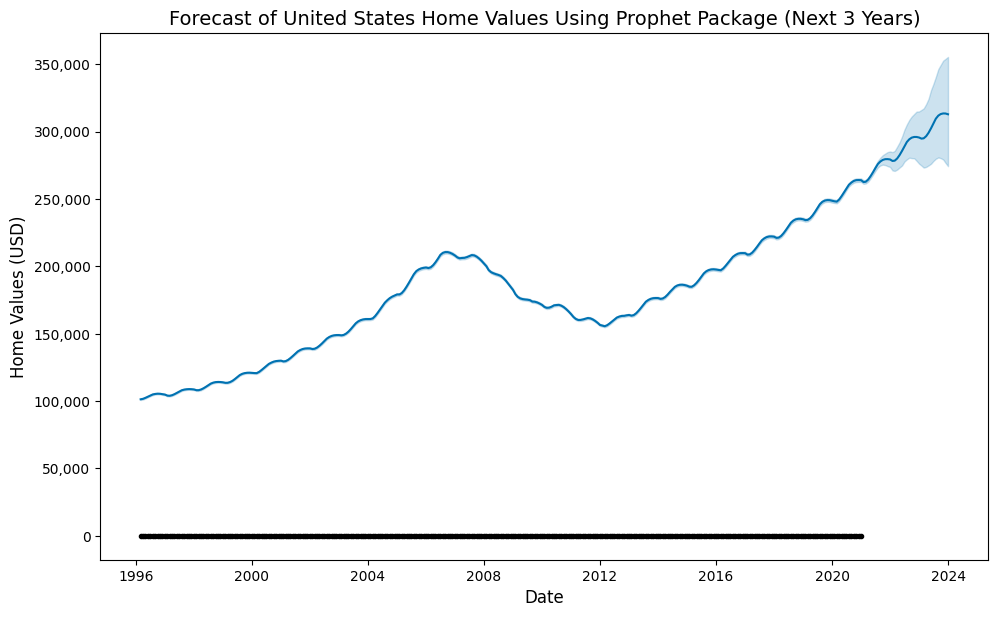

In [ ]:
# Customize the Prophet forecast plot for presentation
fig = model.plot(forecast)

# Get the axes from the figure
ax = fig.gca()

# Set title and axis labels
ax.set_title('Forecast of United States Home Values Using Prophet Package (Next 3 Years)', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Home Values (USD)', fontsize=12)

# Format y-axis labels with commas for better readability
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

# Remove gridlines for a cleaner look
ax.grid(False)

# Show the plot
plt.show()

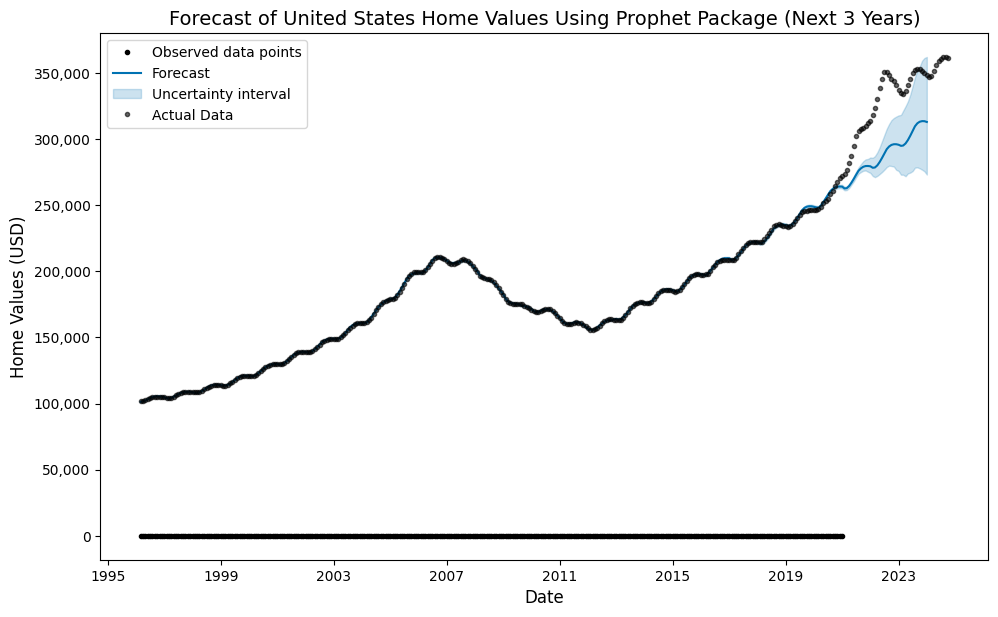

In [ ]:
# Customize the Prophet forecast plot for presentation
fig = model.plot(forecast)

# Add actual data to the forecast plot
ax = fig.gca()  # Get the axes from the figure
ax.plot(us_data['ds'], us_data['y'], 'k.', label='Actual Data', alpha=0.6)  # Add actual data points

# Set title and axis labels
ax.set_title('Forecast of United States Home Values Using Prophet Package (Next 3 Years)', fontsize=14)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Home Values (USD)', fontsize=12)

# Format y-axis labels with commas for better readability
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

# Remove gridlines for a cleaner look
ax.grid(False)

# Add legend for clarity
ax.legend()

# Show the plot
plt.show()


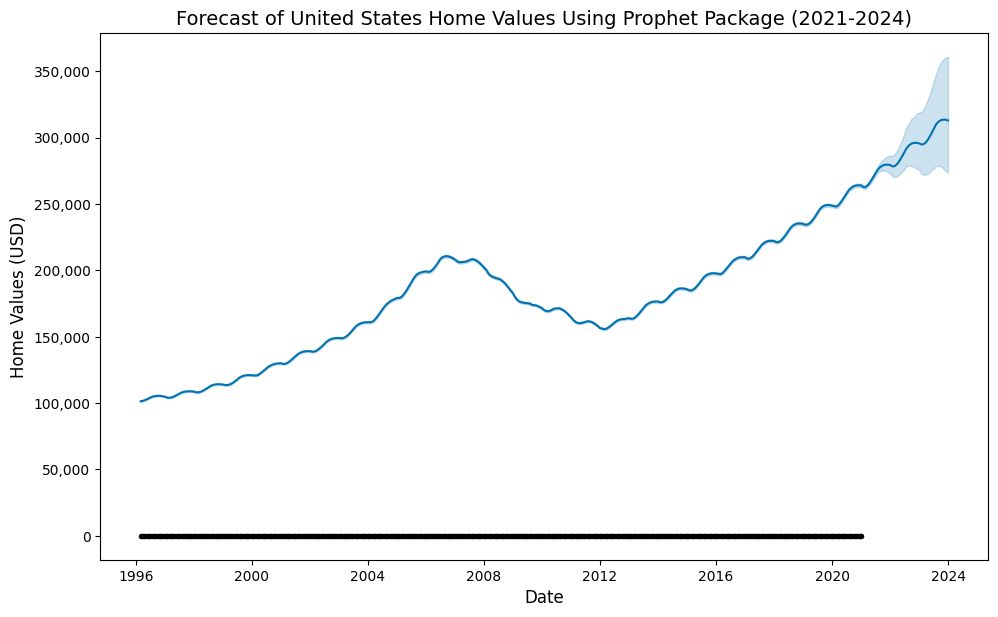

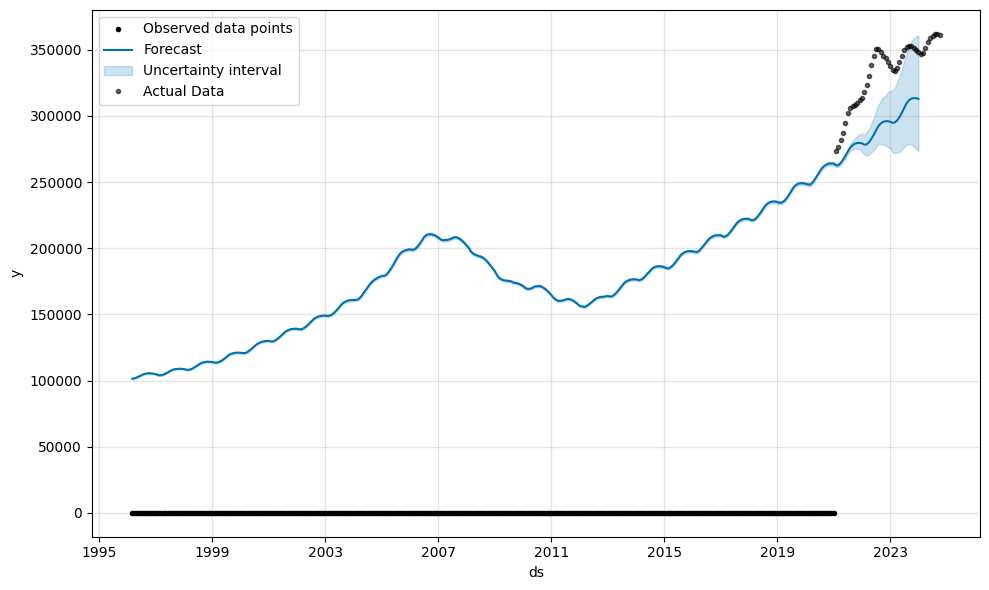

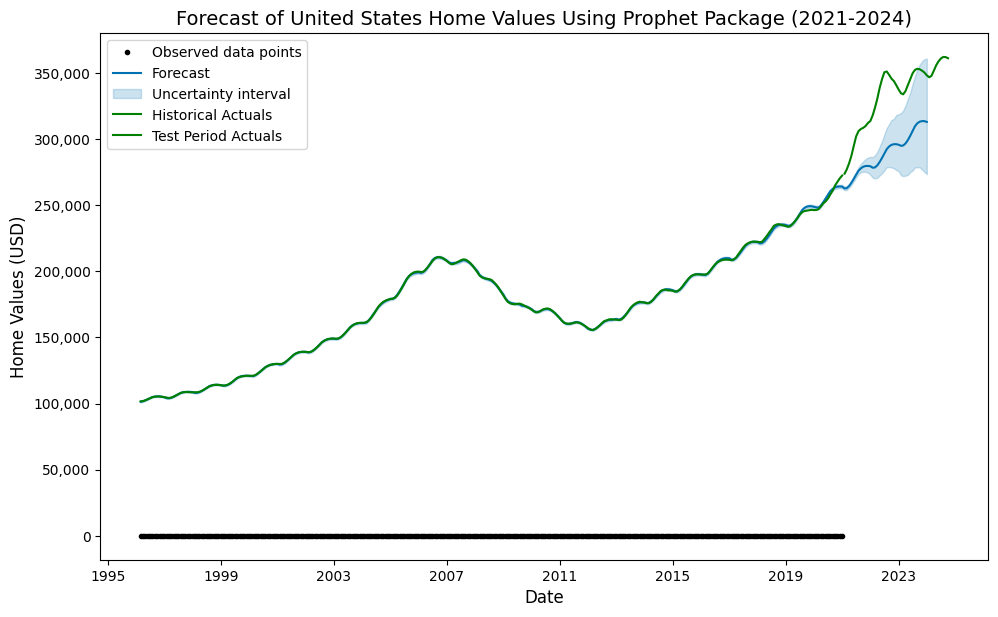

Tuned Model Accuracy Metrics:


In [ ]:
# Create a single plot
plt.figure(figsize=(12, 6))

# Plot the actual values (entire period)
plt.plot(us_data['ds'], us_data['y'], label='Actual Data', color='blue', linestyle='-')

# Plot the forecast (2021-2024)
forecast_36 = forecast[forecast['ds'] >= '2021-01-01']  # Filter the forecast for 2021-2024
plt.plot(
    forecast_36['ds'],
    forecast_36['yhat'],
    label='Forecast (2021-2024)',
    color='red',
    linestyle='--'
)

# Customize the plot
plt.title('United States Housing Value Index Forecast (2021-2024)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Housing Value Index (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Format y-axis labels with commas
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x):,}'))

# Show the plot
plt.tight_layout()
plt.show()


# Test

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qtple62/lpbqto2x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3qtple62/z9hqkpms.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99655', 'data', 'file=/tmp/tmp3qtple62/lpbqto2x.json', 'init=/tmp/tmp3qtple62/z9hqkpms.json', 'output', 'file=/tmp/tmp3qtple62/prophet_modelk8h5wj65/prophet_model-20241204024139.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
02:41:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:41:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 12071.47
MSE: 223901263.69
RMSE: 14963.33


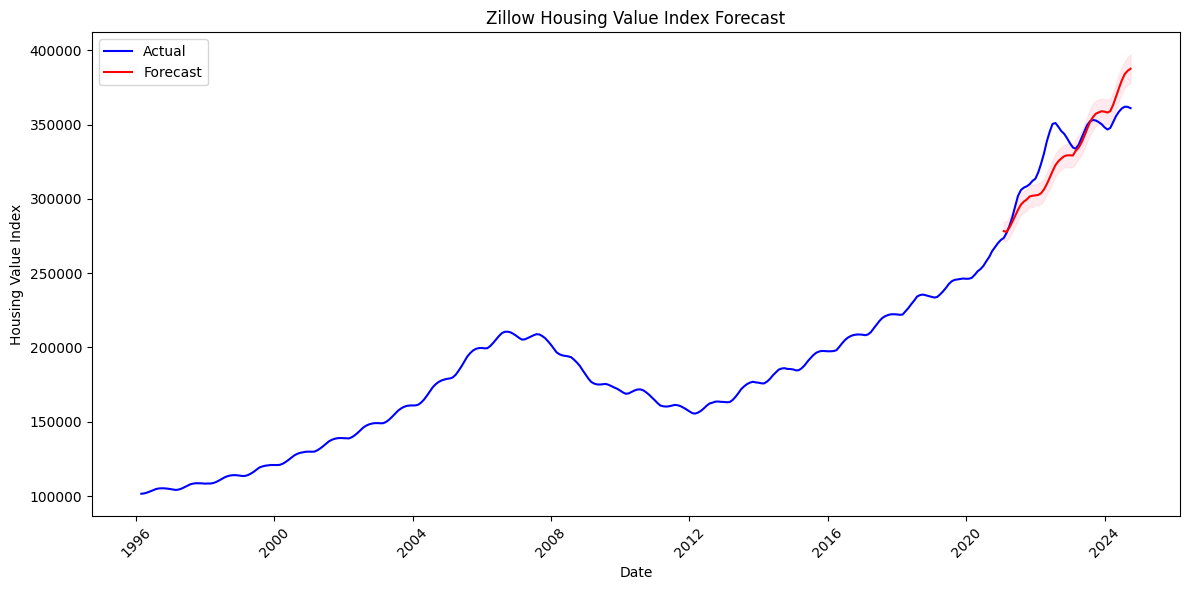

           ds           yhat     yhat_lower     yhat_upper
0  2021-01-31  278290.276342  272006.204217  284832.890282
1  2021-02-28  277756.945804  271462.217577  284666.331030
2  2021-03-31  280622.694266  274290.553040  287767.121281
3  2021-04-30  284380.271768  277500.281925  291292.699590
4  2021-05-31  288554.491040  281676.777927  295511.893903
5  2021-06-30  292573.545915  285872.933667  299879.078285
6  2021-07-31  296084.814990  289337.636919  303004.651697
7  2021-08-31  298158.629025  290724.034595  305402.810373
8  2021-09-30  299504.858774  292196.158750  306314.173708
9  2021-10-31  301591.678130  294701.262727  309343.007248
10 2021-11-30  302059.024698  294316.795748  309522.025507
11 2021-12-31  302314.456367  295806.320358  309524.262046
12 2022-01-31  302656.454742  295733.772332  310548.611831
13 2022-02-28  303752.057621  296623.035809  311124.747184
14 2022-03-31  306291.472900  298880.458062  313300.563514
15 2022-04-30  309898.247092  303320.783631  317688.2449

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Data preparation function
def prepare_prophet_data(df):
    # Select only the date columns (assuming they are numeric)
    date_columns = df.columns[df.columns.str.contains(r'^\d{4}-\d{2}-\d{2}$')]

    # Melt the dataframe to long format
    melted = df.melt(id_vars=['RegionName', 'RegionType', 'StateName'],
                     value_vars=date_columns,
                     var_name='ds',
                     value_name='y')

    # Convert date column
    melted['ds'] = pd.to_datetime(melted['ds'])

    # Filter for United States national data
    us_data = melted[melted['RegionName'] == 'United States']

    # Sort by date
    us_data = us_data.sort_values('ds')

    return us_data

# Log transformation function
def log_transform(series):
    # Add a small constant to avoid log(0)
    return np.log(series + 1)

# Load data
df = pd.read_csv(f'{root_dir}/Copy of Zillow.csv')
prophet_data = prepare_prophet_data(df)

# Log transform the target variable
prophet_data['y_log'] = log_transform(prophet_data['y'])

# Create Prophet model with tuned hyperparameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Increase to make trend more flexible
    seasonality_prior_scale=10,    # Adjust seasonality flexibility
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Fit the model to log-transformed data
model.fit(prophet_data[['ds', 'y_log']].rename(columns={'y_log': 'y'}))

# Create future dataframe for forecast period (2021-2024)
future = model.make_future_dataframe(periods=0)  # No additional periods
future = future[(future['ds'] >= '2021-01-01') & (future['ds'] <= '2024-09-30')]

# Forecast
forecast = model.predict(future)

# Reverse log transformation for predictions
forecast['yhat'] = np.exp(forecast['yhat']) - 1
forecast['yhat_lower'] = np.exp(forecast['yhat_lower']) - 1
forecast['yhat_upper'] = np.exp(forecast['yhat_upper']) - 1

# Merge forecasted data with actual data for evaluation
merged = prophet_data.merge(forecast[['ds', 'yhat']], on='ds', how='inner')

# Calculate MAE, RMSE, and MSE
mae = mean_absolute_error(merged['y'], merged['yhat'])
mse = mean_squared_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], color='red', label='Forecast')
plt.fill_between(forecast['ds'],
                 forecast['yhat_lower'],
                 forecast['yhat_upper'],
                 color='pink',
                 alpha=0.3)
plt.title('Zillow Housing Value Index Forecast')
plt.xlabel('Date')
plt.ylabel('Housing Value Index')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Print forecast details
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


# Prophet Model with Multivariate



In [47]:
# Reshape the dataset for all metrics
metrics_data = df.set_index('Metric').transpose()
metrics_data.index = pd.to_datetime(metrics_data.index, format='%m/%d/%y')
metrics_data = metrics_data.rename_axis('ds').reset_index()

In [48]:
# Split into train (1996-2021) and test (2021-2024)
train_data = metrics_data[metrics_data['ds'] < '2022-01-01']
test_data = metrics_data[metrics_data['ds'] >= '2022-01-01']

In [49]:
# Prepare the target variable (home value) and external regressors
target = 'home_value'
regressors = ['unemployment_rate', 'cpi', 'interest_rate']

In [50]:
# Initialize the Prophet model
from prophet import Prophet

In [51]:
# Initialize the Prophet model with tuned hyperparameters
model = Prophet(
    changepoint_prior_scale=0.05,  # Adjust sensitivity to changepoints (default is 0.05)
    seasonality_prior_scale=10.0,  # Control the strength of seasonality (default is 10.0)
    yearly_seasonality=True,       # Enable yearly seasonality explicitly
    weekly_seasonality=False,      # Disable weekly seasonality
    daily_seasonality=False        # Disable daily seasonality
)

In [52]:
for regressor in regressors:
    model.add_regressor(regressor)

In [53]:
# Fit the model with training data
train_data = train_data.rename(columns={target: 'y'})  # Prophet requires target to be named 'y'
model.fit(train_data[['ds', 'y'] + regressors])

DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l2d_up8/wn5l38ka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8l2d_up8/7q12m9u0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25067', 'data', 'file=/tmp/tmp8l2d_up8/wn5l38ka.json', 'init=/tmp/tmp8l2d_up8/7q12m9u0.json', 'output', 'file=/tmp/tmp8l2d_up8/prophet_model8j763q2v/prophet_model-20241209013529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:35:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:35:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [54]:
# Forecast future values including regressors
future = model.make_future_dataframe(periods=len(test_data), freq='M')
for regressor in regressors:
    future[regressor] = metrics_data[regressor]

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [55]:
forecast = model.predict(future)

In [56]:
# Merge predictions with actual values for plotting
forecast = forecast[['ds', 'yhat']]
results = pd.merge(metrics_data[['ds', 'home_value']], forecast, on='ds', how='left')
results = results.rename(columns={'home_value': 'actual', 'yhat': 'predicted'})

In [57]:
results

,ds,actual,predicted
0,1996-02-29,101741.6914,96322.848757
1,1996-03-31,101999.2795,98518.066522
2,1996-04-30,102545.3385,100642.672889
3,1996-05-31,103287.9317,102740.329692
4,1996-06-30,104089.7239,104220.622944
...,...,...,...
340,2024-06-30,361237.9458,380763.495086
341,2024-07-31,362419.9663,383154.113013
342,2024-08-31,362308.7904,384703.853977
343,2024-09-30,361437.8462,386156.363059


In [58]:
# Filter results to the forecast period (2021-2024)
forecast_results = results[results['ds'] >= '2021-01-01']

# Calculate MAE and RMSE
mae = mean_absolute_error(forecast_results['actual'], forecast_results['predicted'])
rmse = np.sqrt(mean_squared_error(forecast_results['actual'], forecast_results['predicted']))
mape = np.mean(np.abs((forecast_results['actual'] - forecast_results['predicted']) / forecast_results['actual'])) * 100

# Number of observations and parameters
n = len(forecast_results)  # Number of observations
k = 2  # Adjust this based on your model; include intercept and other parameters

# Calculate RSS (Residual Sum of Squares)
rss = np.sum((forecast_results['actual'] - forecast_results['predicted']) ** 2)

# Calculate AIC and BIC
aic = n * np.log(rss / n) + 2 * k
bic = n * np.log(rss / n) + k * np.log(n)

In [59]:
print("Evaluation Metrics:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Akaike Information Criterion (AIC): {aic:.2f}")
print(f"Bayesian Information Criterion (BIC): {bic:.2f}")

Evaluation Metrics:
MAE: 12099.971434259276
RMSE: 13766.766115664386
Mean Absolute Percentage Error (MAPE): 3.55%
Akaike Information Criterion (AIC): 880.76
Bayesian Information Criterion (BIC): 884.42


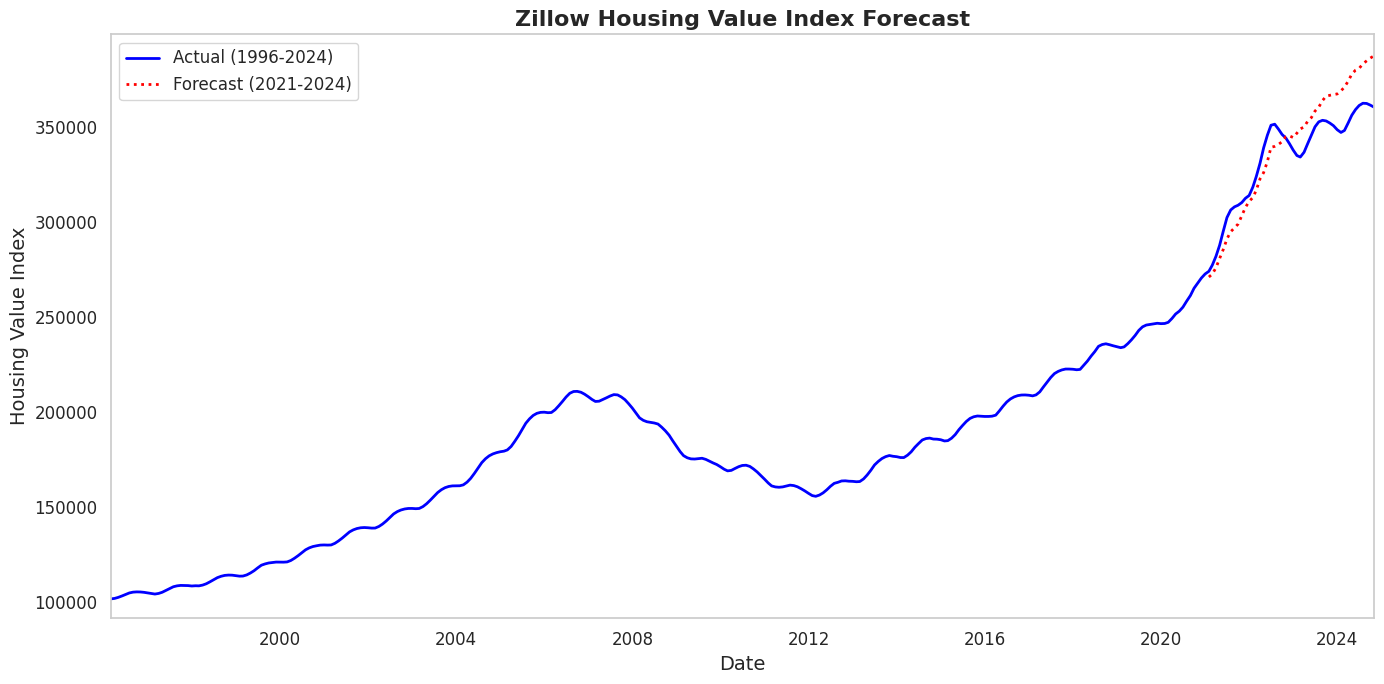

In [60]:
# Plot the results
plt.figure(figsize=(14, 7))

# Actual values as a continuous line
plt.plot(
    results['ds'],
    results['actual'],
    label='Actual (1996-2024)',
    color='blue',
    linewidth=2
)

# Forecasted values as a dotted line
plt.plot(
    results[results['ds'] >= '2021-01-01']['ds'],
    results[results['ds'] >= '2021-01-01']['predicted'],
    label='Forecast (2021-2024)',
    color='red',
    linestyle='dotted',
    linewidth=2
)

# Title and labels
plt.title('Zillow Housing Value Index Forecast', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Housing Value Index', fontsize=14)

# Customize ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12)

# Remove gridlines for a cleaner look
plt.grid(False)

# Set axis limits and ticks for clarity
plt.xlim(results['ds'].min(), results['ds'].max())
plt.ylim(min(results['actual']) * 0.9, max(results['actual']) * 1.1)

# Save and display the plot
plt.tight_layout()

In [ ]:
#Forecast through 2027